Omar Mancilla Martínez

# Análisis exploratorio: Taxis 

## Introducción 

Buscamos explorar la relación entre el clima y el tiempo de viaje de los taxis, en particular abordaremos la hipotesis:

*"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".*

Para ello, exploraremos los comportamientos de las distintas empresas de taxis, los viajes que realizan, los destinos mas comunes y el efecto del clima al inicio de los viajes.

Los objetivos de este informe son:

- Cargar y explorar los datos
- Pre-procesar: depurar, organizar y enriquecer los datos
- Analizar: Encontrar relaciones entre viajes y clima.
- Corroborar estadisticamente lo obtenido del analisis.

Iniciaremos con el 
## Pre-proseamiento de datos


In [1]:
# Cargar todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
import math as mt
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns


from IPython.display import display
from IPython.display import HTML

In [2]:
# Cargar DF
df_company_trips = pd.read_csv("./datasets/project_sql_result_01.csv")
df_drop_avg = pd.read_csv("./datasets/project_sql_result_04.csv")
df_loop_ohare = pd.read_csv("./datasets/project_sql_result_07.csv")

### Diccionario de datos:
df_company_trips:

- company_name: nombre de la empresa de taxis
- trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

df_drop_avg:

- dropoff_location_name: barrios de Chicago donde finalizaron los viajes
- average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

df_loop_ohare:

- start_ts: fecha y hora de la recogida.
- weather_conditions:  condiciones climáticas en el momento en el que comenzó el viaje.
- duration_seconds: duración del viaje en segundos.


In [3]:
df_company_trips.sample(10)

,company_name,trips_amount
9,Blue Ribbon Taxi Association Inc.,5953
58,5062 - 34841 Sam Mestas,8
43,2809 - 95474 C & D Cab Co Inc.,29
24,Chicago Taxicab,1014
8,Star North Management LLC,7455
19,Chicago Medallion Leasing INC,1607
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3
51,4623 - 27290 Jay Kim,15
27,Service Taxi Association,402
23,KOAM Taxi Association,1259


In [4]:
df_company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
df_company_trips.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


El primer dataframe parece estar en buenas condiciones.
- sin datos faltantes
- tipos de dato correctos

Notamos que hay una fuerte discrepancia entre el promedio y la mediana.

In [6]:
df_drop_avg.sample(10)

,dropoff_location_name,average_trips
49,"Sauganash,Forest Glen",43.566667
20,Rush & Division,395.533333
41,North Park,67.833333
19,Old Town,469.566667
43,Mckinley Park,64.033333
61,Grand Crossing,22.600000
22,Lincoln Square,356.733333
8,Gold Coast,1364.233333
90,Hegewisch,3.117647
63,Andersonville,16.866667


In [7]:
df_drop_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
df_drop_avg.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


notamos que el segundo dataframe igual esta en buenas condiciones:
 - sin datos nulos
 - los tipos de dato son correctos

la mediana y la media difieren significativamente.

In [9]:
df_loop_ohare.sample(10)

,start_ts,weather_conditions,duration_seconds
207,2017-11-11 08:00:00,Good,1200.0
835,2017-11-11 10:00:00,Good,1200.0
7,2017-11-18 11:00:00,Good,2280.0
560,2017-11-11 06:00:00,Good,1380.0
641,2017-11-11 14:00:00,Good,2100.0
1060,2017-11-04 14:00:00,Good,2700.0
661,2017-11-11 10:00:00,Good,1465.0
114,2017-11-11 16:00:00,Good,2591.0
426,2017-11-11 07:00:00,Good,1443.0
761,2017-11-04 17:00:00,Bad,2760.0


In [10]:
df_loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [11]:
df_loop_ohare.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


Notamos lo siguiente del tercer dataframe:
- No hay datos nulos
- las marcas de tiempo tienen el tipo de dato incorrecto

La media y mediana se encuentran en el mismo orden de magnitud.

In [12]:
df_loop_ohare["start_ts"] = pd.to_datetime(df_loop_ohare["start_ts"])

display(df_loop_ohare.sample(10))
df_loop_ohare.info()

,start_ts,weather_conditions,duration_seconds
946,2017-11-04 15:00:00,Good,3180.0
580,2017-11-04 13:00:00,Good,3420.0
864,2017-11-11 13:00:00,Good,1980.0
543,2017-11-18 06:00:00,Good,1500.0
689,2017-11-11 11:00:00,Good,1440.0
656,2017-11-11 06:00:00,Good,1440.0
912,2017-11-04 18:00:00,Bad,2488.0
645,2017-11-18 18:00:00,Good,2460.0
412,2017-11-11 07:00:00,Good,1335.0
1067,2017-11-04 16:00:00,Bad,2834.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Se corrigo el tipo de dato de la marca de tiempo.

## Analisis de los datos:

Buscaremos los principales destinos de lso taxis, la cuota de mercado de las distintas empresas de taxis y generaremos graficos correspondientes.

In [13]:
top_drop = df_drop_avg.sort_values(
    by="average_trips", ascending=False).head(10)
display(top_drop)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


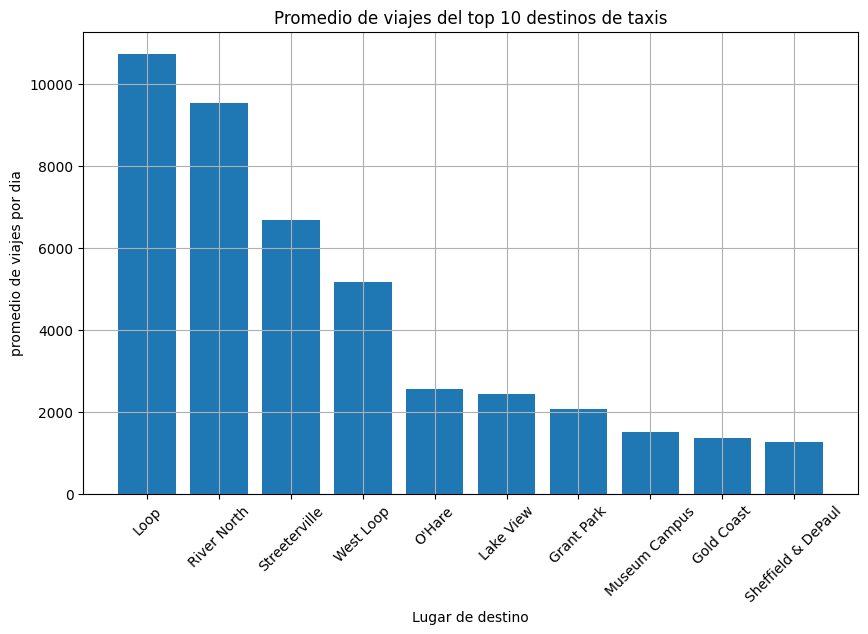

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(top_drop['dropoff_location_name'], top_drop['average_trips'])
plt.xlabel('Lugar de destino')
plt.ylabel('promedio de viajes por dia')
plt.title('Promedio de viajes del top 10 destinos de taxis')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Notamos que:
- el destino mas común de los viajes en taxi en general es el barrio Loop.



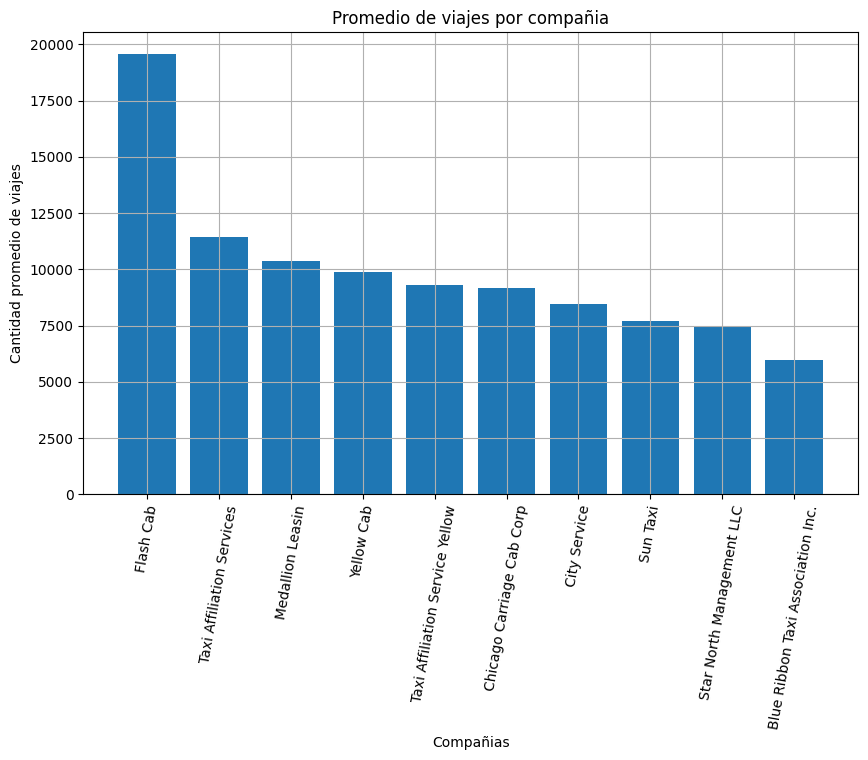

In [15]:

plt.figure(figsize=(10, 6))
plt.bar(df_company_trips.head(10)["company_name"],
        df_company_trips.head(10)["trips_amount"])
plt.xlabel('Compañias')
plt.ylabel('Cantidad promedio de viajes')
plt.title('Promedio de viajes por compañia')
plt.xticks(rotation=80)
plt.grid()
plt.show()

Notamos que 
- la empresa con más viajes es flash cab casi doblando al segundo lugar.
- la diferencia entre el segundo y tercer lugar es mucho menor.
- La cantidad de viajes a Loop es aproximadamente la mitad de la cantdiad de viajes que realiza la empresa mas popular, de ahi su importancia.


## Prueba de hipotesis:
La hipotesis que se desea comprobar es: *"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".*
a través de df_loop_ohare que contiene los datos de tiempo, clima y fecha de los viajes del barrio al aeropuerto.


Partiremos creando dos dataframes, dividiendo los sabados con y sin lluvia para luego coompararlos con una prueba T.


In [16]:
df_loop_ohare_good = df_loop_ohare.query("weather_conditions == 'Good'")
df_loop_ohare_bad = df_loop_ohare.query("weather_conditions == 'Bad'")

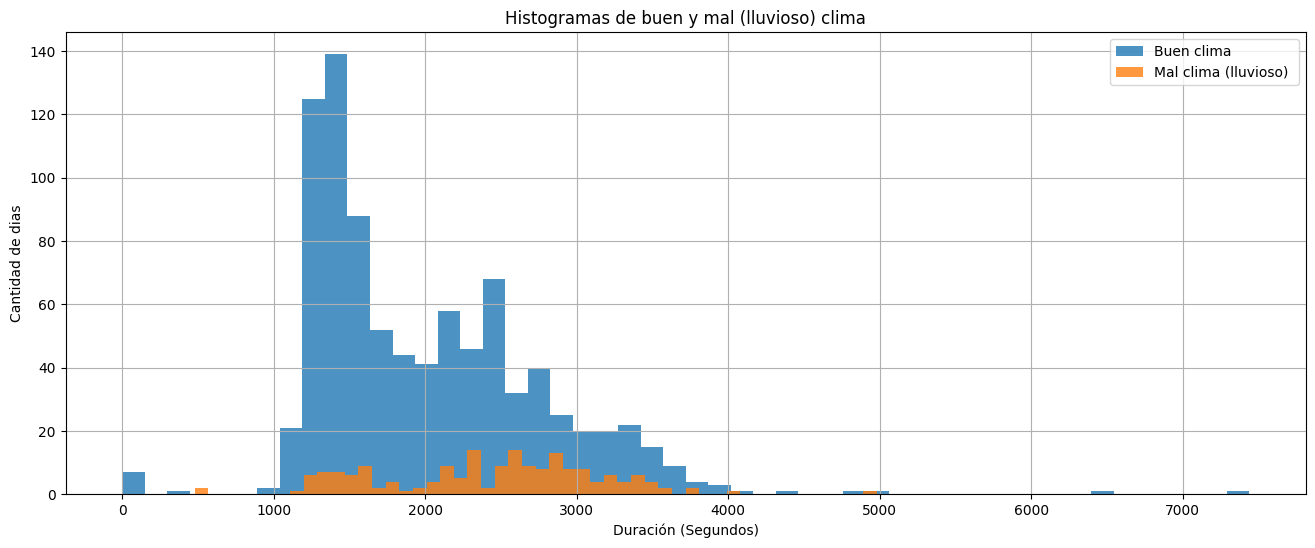

In [17]:
plt.figure(figsize=(16, 6))
plt.hist(df_loop_ohare_good["duration_seconds"], alpha=0.8, bins=50)
plt.hist(df_loop_ohare_bad["duration_seconds"], alpha=0.8, bins=50)
plt.xlabel('Duración (Segundos)')
plt.ylabel('Cantidad de dias')
plt.title('Histogramas de buen y mal (lluvioso) clima')
plt.legend(['Buen clima', 'Mal clima (lluvioso) '])
plt.grid()
plt.show()

Aunque ilustratvio, el histograma de buen (buen clima) es mucho mayor que el de mal (lluvioso) debido a la cantidad de eventos, es mucho mas comun tener un dia de buen clima que uno lluvioso, asi que procederemos a normalizar.

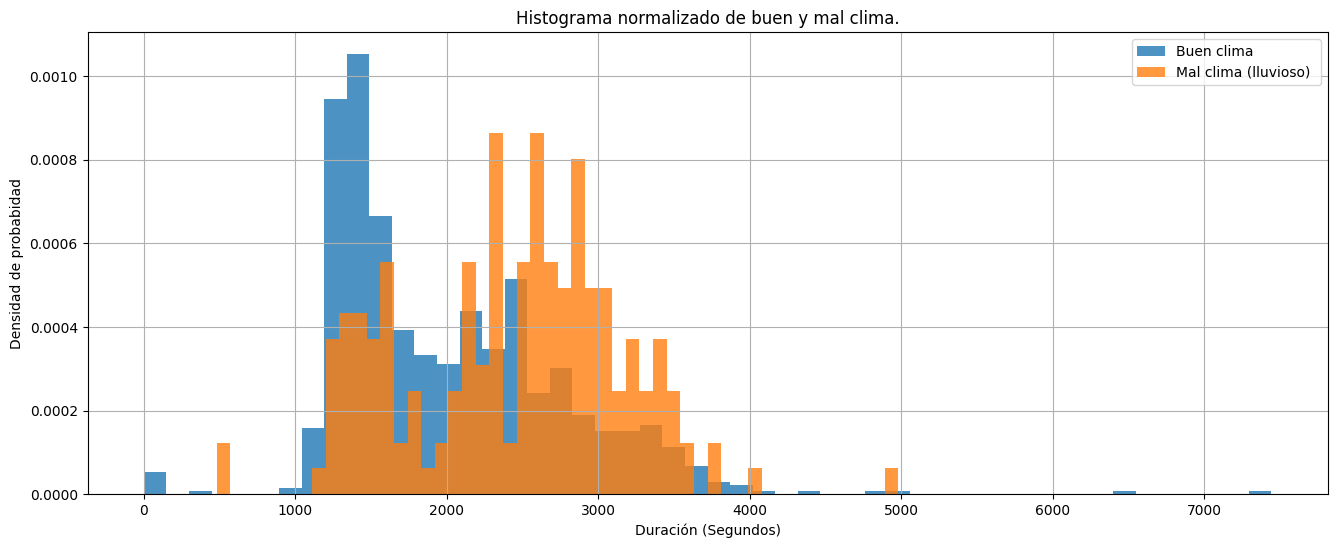

In [18]:
plt.figure(figsize=(16, 6))
plt.hist(df_loop_ohare_good["duration_seconds"],
         alpha=0.8, density=True, bins=50)
plt.hist(df_loop_ohare_bad["duration_seconds"],
         alpha=0.8, density=True, bins=50)
plt.xlabel('Duración (Segundos)')
plt.ylabel('Densidad de probabidad')
plt.title('Histograma normalizado de buen y mal clima.')
plt.legend(['Buen clima', 'Mal clima (lluvioso) '])
plt.grid()
plt.show()

Con esta ilustración podemos notar que existen cambios en los tiempos de viaje.

En busca de determinar el efecto de dichos cambios usaremos una prueba estadistica para rechazar alguna de las dos hipotesis siguientes:

Hipotesis nula $H_0$: *"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual todos los sábados".*

Hipotesis alternativa $H_1$: *"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".*

Donde la hipotesis nula $H_0$ señala igualdad entre las medias y que no hay efecto estadístico por las lluvias, la hipotesis alternativa $H_1$ senala desigualdad entre las medias y apunta que si existe un efecto estadistico por el fenomeno señalado, la lluvia.
Para rechazar alguna de estas hipotesis usaremos una prueba T y usaremos un valor de significancia estdistica $\alpha$  holgado ($5$) pues el comportamiento es poco estricto.
Previo a la prueba T, aplicaremos una prueba de levene para determinar si las varianzas de las dos muestras pueden ser consideradas iguales.


Primero hacemos una prueba de levene, la cual tiene por hipotesis nula:

*"todas las muestras provienen de poblaciones con varianzas iguales"*



In [19]:
res = st.levene(df_loop_ohare_good["duration_seconds"],
                df_loop_ohare_bad["duration_seconds"])
print('valor p:', res.pvalue)
alpha = 5

if (res.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.5332038671974493
Rechazamos la hipótesis nula


como se puede ver, la prueba de levene  rechaza la hipótesis nula, por lo cual usaremos el parametro "equal_var=False" en la siguiente prueba T

In [20]:


alpha = 5  # tu código: establece un nivel crítico de significación estadística

results = st.ttest_ind(df_loop_ohare_good["duration_seconds"],
                       df_loop_ohare_bad["duration_seconds"], equal_var=False)

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 6.738994326108734e-12
Rechazamos la hipótesis nula


La prueba T rechaza la hipótesis nula. Por ello propondremos como **conclusión:** 
**"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"**

## Conclusión General:

A lo largo de este proyecto:
1. Se extrajeron los datos de clima desde un sitio web, a través de python y beutiful soup.
2. A través de SQL se realizó un analisis exploratorio de datos:
    - se transformaron las tablas del sitio a tablas utiles para el proyecto.
3. Se cargaron, exploraron y corrigieron las tablas generadas con SQL.
    - Se corrigió el tipo de dato de las marcas de tiempo.
5. Se graficó y encontraron las siguientes observaciónes:
    - la empresa con más viajes es flash cab casi doblando al segundo lugar.
    - la diferencia entre el segundo y tercer lugar es mucho menor.
    - La cantidad de viajes a Loop es aproximadamente la mitad de la cantdiad de viajes que realiza la empresa mas popular, de ahi su importancia.
    - el destino mas común de los viajes en taxi en general es el barrio Loop.
6. Finalmente a través de pruebas estadisticas se rechazó la hipotesis nula, demostrando que las lluvias cambian el tiempo de viaje de "Loop" al aeropuerto.
